In [5]:
import numpy as np
import pandas as pd
import mne
from mne.channels import make_standard_montage
import numpy as np
import copy
import matplotlib.pyplot as plt
import mne
from autoreject import get_rejection_threshold, AutoReject
from mne.preprocessing import ICA, corrmap
from numpy import genfromtxt
import seaborn as sns
#my_data = genfromtxt('Hyper39_Dual3.txt', delimiter=',',dtype=None)

In [6]:
class Df_metka():
    def __init__(self,name,path):
        self.name = name
        self.df = pd.read_csv(path, sep=",",header=None)
        self.df_path = path.replace('_Metki', '')
        self.metki = self.df.drop(self.df.iloc[:, 2:(len(self.df.columns))],axis=1)
        self.metki_del = np.where((self.metki[1]==0)|(self.metki[1]==9))[0]
        self.metki.drop(index=self.metki_del,inplace=True)
        self.metki.insert(1, 2, [0 for i in range(self.metki.shape[0])])
        self.frame = pd.read_csv(self.df_path , sep='\s+',header=None)
        Q1 = self.frame.quantile(0.25)
        Q3 = self.frame.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 5*IQR
        upper = Q3 + 5*IQR
        self.condit = np.where((self.frame>=upper)|(self.frame<=lower))[0] 
        self.frame.drop(index=self.condit,inplace=True)
        self.frame = self.frame.T

In [7]:
df_3_4 = Df_metka('3_4','Metki/Hyper03_Hyper04_Metki.txt')
df_15_16 = Df_metka('15_16','Metki/Hyper15_Hyper16_Metki.txt')

In [8]:
# metki_3_4 = df_3_4.metki
# dataframe_3_4 = df_3_4.frame
metki_15_16 = df_15_16.metki
dataframe_15_16 = df_15_16.frame

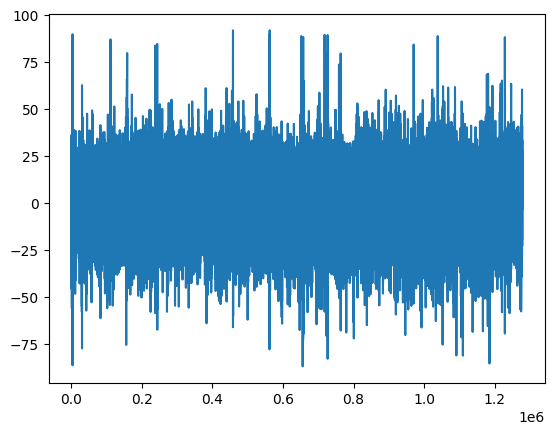

In [9]:
plt.plot(dataframe_15_16.loc[2].index,dataframe_15_16.loc[2])
plt.show()

In [10]:
# to_del = metki_15_16[((metki_15_16[1]==9)|(metki_15_16[1]==0))&(metki_15_16[0]<dataframe_15_16.shape[1])][0]

In [11]:
dataframe_15_16_1 = dataframe_15_16.iloc[0:15]
dataframe_15_16_2 = dataframe_15_16.iloc[15:]

In [7]:
# df_test_3 = df_15_16.frame.iloc[0:15]
# df_test_4 = df_15_16.frame.iloc[15:]

In [12]:
sfreq = 500 #Hz
ch_names = ['Fpz','F7','F3','Fz','F4','F8','C3',
            'C4','T5','P3','Pz','P4','T6','O1','O2']
print(len(ch_names))
info = mne.create_info(ch_names, sfreq,ch_types='eeg')
mne_array_1 = mne.io.RawArray(dataframe_15_16_1, info)
mne_array_2 = mne.io.RawArray(dataframe_15_16_2, info)

15
Creating RawArray with float64 data, n_channels=15, n_times=1261606
    Range : 0 ... 1261605 =      0.000 ...  2523.210 secs
Ready.
Creating RawArray with float64 data, n_channels=15, n_times=1261606
    Range : 0 ... 1261605 =      0.000 ...  2523.210 secs
Ready.


In [498]:
# df_3_4 = Df_metka('3_4','Metki/Hyper03_Hyper04_Metki.txt')
# df_15_16 = Df_metka('15_16','Metki/Hyper15_Hyper16_Metki.txt')
# df_21_22 = Df_metka('21_22','Metki/Hyper21-Hyper22_Metki.txt')
# df_27_28 = Df_metka('27_28','Metki/Hyper27-Hyper28_Metki.txt')
# df_29_30 = Df_metka('29_30','Metki/Hyper29-Hyper30.txt')
# df_31_32 = Df_metka('31_32','Metki/Hyper31-Hyper32_Metki.txt')
# df_33_34 = Df_metka('33_34','Metki/Hyper33-Hyper34_Metki.txt')
# df_35_36 = Df_metka('35_36','Metki/Hyper35-Hyper36_Metki.txt')
# df_41_42 = Df_metka('41_42','Metki/Hyper41-Hyper42_Metki.txt')
# df_43_44 = Df_metka('43_44','Metki/Hyper43-Hyper44_Metki.txt')

In [499]:
# dat_1 = pd.read_csv('Hyper_scanning.csv',';')
# dat_2 = pd.read_csv('Hyper_scanning_2.csv',';')

In [500]:
# dat_1 = dat_1.T
# dat_2 = dat_2.T

In [16]:
# dat_1 = dat_1.drop([i for i in range(1251)], axis=1)
# dat_2 = dat_2.drop([i for i in range(1251)], axis=1)
# dat_2

In [14]:
# plt.plot(df_test_4.loc[15].index,df_test_4.loc[17])
# plt.show()

In [148]:
# """Viewing raw data"""
# mne_array_2.plot(scalings=(10))

In [13]:
event_id = {'First': 1, 'Second': 2}

In [ ]:
# events_mne = mne.read_events('Metki1.txt')

In [14]:
events_mne = metki_15_16.to_numpy()

In [ ]:
# for i in range(len(events_mne)):
#     events_mne[i][0]*=250
# events_mne

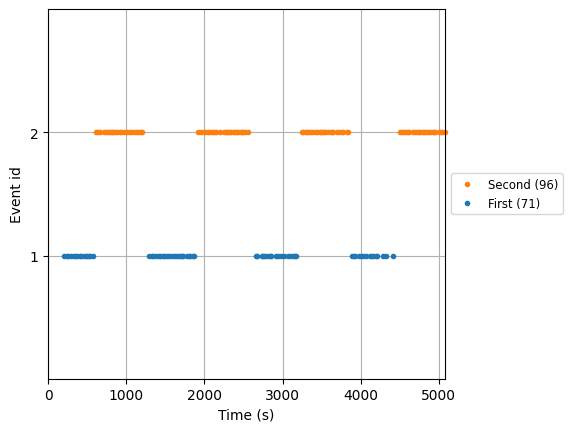

In [15]:
fig = mne.viz.plot_events(events_mne, sfreq=500, event_id=event_id)
fig.subplots_adjust(right=0.7)  # make room for legend

In [505]:
# events['Latency'] = events['Latency'].apply(lambda x: int(x))
# events['Latency'].duplicated().sum()

C:\Temp\ipykernel_12816\212776115.py:6: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


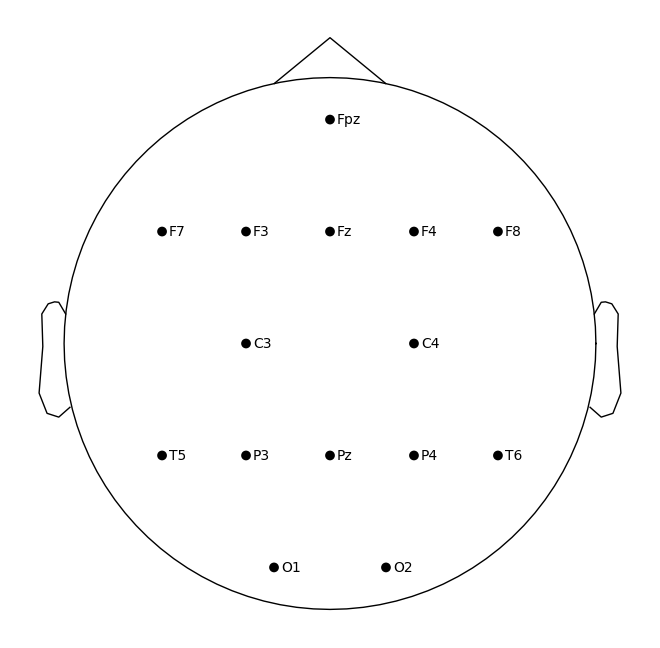

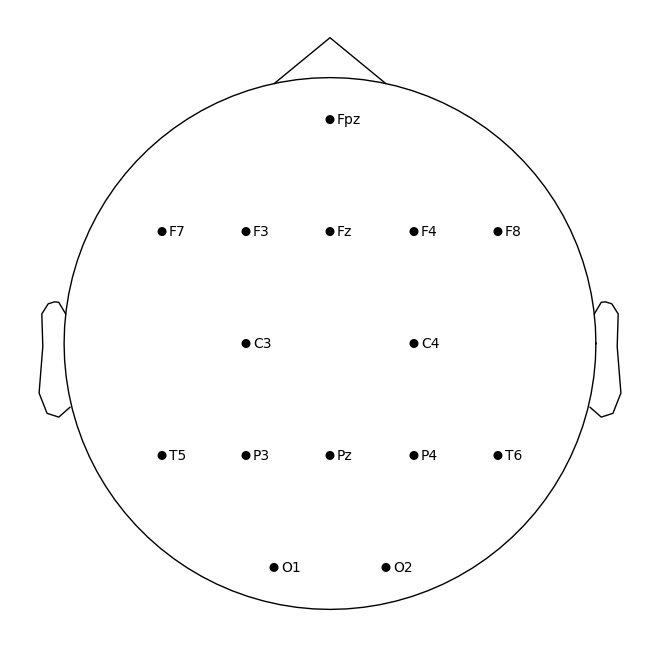

In [16]:
#montage = mne.channels.make_standard_montage('biosemi16')
locations = {'Fpz':[0,0.08,0],'F7':[-0.06,0.04,0],'F3':[-0.03,0.04,0],'Fz':[0,0.04,0],'F4':[0.03,0.04,0],
             'F8':[0.06,0.04,0],'C3':[-0.03,0,0],'C4':[0.03,0,0],'T5':[-0.06,-0.04,0],'P3':[-0.03,-0.04,0],
            'Pz':[0,-0.04,0],'P4':[0.03,-0.04,0],'T6':[0.06,-0.04,0],'O1':[-0.02,-0.08,0],'O2':[0.02,-0.08,0]}
montage = mne.channels.make_dig_montage(locations)
montage.plot()

In [17]:
mne_array_1.set_montage(montage)
mne_array_2.set_montage(montage)

C:\Temp\ipykernel_12816\247059352.py:1: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mne_array_1.set_montage(montage)
C:\Temp\ipykernel_12816\247059352.py:2: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  mne_array_2.set_montage(montage)


<RawArray | 15 x 1261606 (2523.2 s), ~144.4 MB, data loaded>

In [18]:
epoch_1 = mne.Epochs(mne_array_1, events_mne, event_id, preload=True)
epoch_2 = mne.Epochs(mne_array_2, events_mne, event_id, preload=True)

Not setting metadata
167 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 167 events and 351 original time points ...
81 bad epochs dropped
Not setting metadata
167 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 167 events and 351 original time points ...
81 bad epochs dropped


In [19]:
print("\nEpochs Info:")
print(epoch_1)


Epochs Info:
<Epochs |  86 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~3.5 MB, data loaded,
 'First': 38
 'Second': 48>


In [20]:
np.array(epoch_1).shape[0]

86

In [21]:
event_id

{'First': 1, 'Second': 2}

In [22]:
import statsmodels
print(statsmodels.__version__)

0.13.5


In [23]:
import hypyp
from hypyp import prep 

In [23]:
# # def epochs():
# #     #epoch_1 = mne.io.read_raw_fieldtrip('d:/user/Desktop/Hyperscanning_py/Hyper39Dual3.mat',info=None)
# #     epoch_1 = mne.read_epochs(r'd:\user\Desktop\Hyperscanning_py\Hyper39Dual3.mat')
# #     #epoch_2 = mne.read_epochs_fieldtrip(r'd:\user\Desktop\Hyperscanning_py\Hyper40Dual3')
# #     return epoch_1,epoch_2
# # epoch_1,epoch_2 = epochs()
# def high_pass_filtering(raw1,raw2):
#     filt_raws = prep.filt(raws=[raw1,raw2])
#     return filt_raws
# def computing_ICA(epochs_1,epochs_2):
#     icas = prep.ICA_fit(epochs=[epochs_1,epochs_2],n_components = 15,method = 'infomax',
#                         fit_params=dict(extended=True),random_state = 42)
#     montage.plot()
#     cleaned_epochs_ICA = prep.ICA_choice_comp(icas,epochs=[epochs_1,epochs_2])
#     cleaned_epochs_AR = prep.AR_local(cleaned_epochs_ICA,verbose=True)
#     return cleaned_epochs_ICA,cleaned_epochs_AR
# cleaned_epochs_ICA,cleaned_epochs_AR = computing_ICA(epoch_1,epoch_2)
# def merge(epochs1,epochs2):
#     hyper_epo = merge(epochs_S1=epochs1,epochs_S2 = epochs2)
#     epochs1,epochs2 = split(hyper_epo)

In [107]:
# preproc_S1 = cleaned_epochs_AR[0][0]
# preproc_S2 = cleaned_epochs_AR[0][1]

In [24]:
cleaned_epochs_no_ICA = [epoch_1, epoch_2]

Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/15 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/15 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.50 and n_interpolate=1
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/15 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/15 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/86 [00:00<?,       ?it/s]

C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\mne\bem.py:1119: RuntimeWarning: Mean of empty slice.
  radius_init = radii.mean()
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\numpy\core\_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=1
Dropped 21 epochs: 0, 7, 15, 18, 30, 33, 43, 49, 51, 54, 58, 65, 67, 69, 70, 79, 80, 81, 82, 83, 84


  0%|          | Repairing epochs : 0/65 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
Dropped 21 epochs: 0, 7, 15, 18, 30, 33, 43, 49, 51, 54, 58, 65, 67, 69, 70, 79, 80, 81, 82, 83, 84


  0%|          | Repairing epochs : 0/65 [00:00<?,       ?it/s]

No bad epochs were found for your data. Returning a copy of the data you wanted to clean. Interpolation may have been done.
24.418604651162788 percent of bad epochs


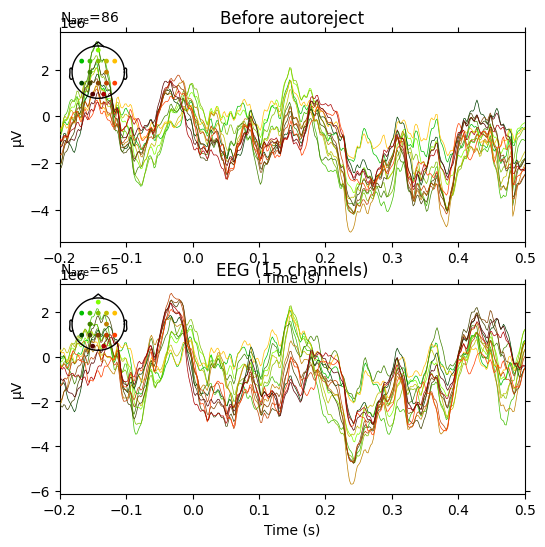

<Figure size 640x480 with 0 Axes>

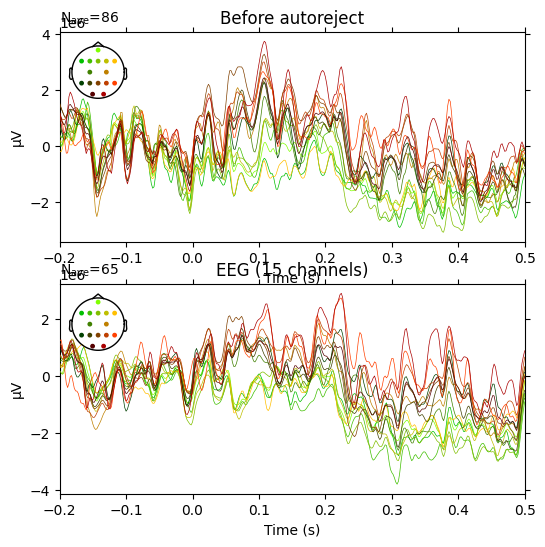

<Figure size 640x480 with 0 Axes>

In [25]:
# without ICA

no_ICA_cleaned_epochs_AR, no_ICA_dic_AR = prep.AR_local(cleaned_epochs_no_ICA,
                                          strategy="union",
                                          threshold=50.0,
                                          verbose=True
)

In [26]:
no_ICA_preproc_S1 = no_ICA_cleaned_epochs_AR[0]
no_ICA_preproc_S2 = no_ICA_cleaned_epochs_AR[1]

In [27]:
no_ICA_preproc_S1

Number of events,65
Events,First: 31Second: 34
Time range,-0.200 – 0.500 sec
Baseline,-0.200 – 0.000 sec


In [24]:
# preproc_S1

In [28]:
from hypyp import analyses
from scipy.stats import circmean

In [29]:
# psd1 = analyses.pow(preproc_S1, fmin=7.5, fmax=11,
#                     n_fft=1000, n_per_seg=1000, epochs_average=True)
# psd2 = analyses.pow(preproc_S2, fmin=7.5, fmax=11,
#                     n_fft=1000, n_per_seg=1000, epochs_average=True)
# data_psd = np.array([psd1.psd, psd2.psd])

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)


In [31]:
# psd_test = analyses.pow(preproc_S2, fmin=7.5, fmax=11,
#                     n_fft=1000, n_per_seg=1000, epochs_average=False)

Effective window size : 2.000 (s)


In [26]:
# psd2.psd

In [29]:
no_ICA_psd1 = analyses.pow(no_ICA_preproc_S1, fmin=7.5, fmax=11,
                    n_fft=1000, n_per_seg=1000, epochs_average=True)
no_ICA_psd2 = analyses.pow(no_ICA_preproc_S2, fmin=7.5, fmax=11,
                    n_fft=1000, n_per_seg=1000, epochs_average=True)
no_ICA_data_psd = np.array([no_ICA_psd1.psd, no_ICA_psd2.psd])

Effective window size : 2.000 (s)
Effective window size : 2.000 (s)


In [37]:
# data_inter = np.array([preproc_S1, preproc_S2])
# data_inter_1 = np.array([preproc_S1['First'], preproc_S2['First']])
# data_inter_2 = np.array([preproc_S1['Second'], preproc_S2['Second']])

In [30]:
data_inter_no_ICA_1 = np.array([no_ICA_preproc_S1['First'], no_ICA_preproc_S2['First']])
data_inter_no_ICA_2 = np.array([no_ICA_preproc_S1['Second'], no_ICA_preproc_S2['Second']])

In [31]:
no_ICA_data_inter = np.array([no_ICA_preproc_S1, no_ICA_preproc_S2])

In [30]:
full_freq = { 'full_frq': [1, 48]}
sampling_rate= 500

In [32]:
from scipy import stats

In [33]:
freq_bands = {'alpha':[7.5,11.5],'beta':[12,20]}
# complex_signal = analyses.compute_freq_bands(data_inter_1,sampling_rate, freq_bands=freq_bands)
# without ICA
no_ICA_complex_signal_1 = analyses.compute_freq_bands(data_inter_no_ICA_1, sampling_rate, freq_bands)
no_ICA_complex_signal_2 = analyses.compute_freq_bands(data_inter_no_ICA_2, sampling_rate, freq_bands)

NameError: name 'sampling_rate' is not defined

In [ ]:
no_ICA_complex_signal_1.shape

In [ ]:
 n_epoch, n_ch, n_freq, n_samp = no_ICA_complex_signal_1.shape[1], no_ICA_complex_signal_1.shape[2], \
                                    no_ICA_complex_signal_1.shape[3], no_ICA_complex_signal_1.shape[4]
transpose_axes = (0, 1, 3, 2)
    # calculate all epochs at once, the only downside is that the disk may not have enough space
complex_signal_1 = no_ICA_complex_signal_1.transpose((1, 3, 0, 2, 4)).reshape(n_epoch, n_freq, 2 * n_ch, n_samp)
transpose_axes_1 = (0, 1, 3, 2)
angle = np.angle(complex_signal_1)
mu_angle = circmean(angle, axis=3).reshape(n_epoch, n_freq, 2 * n_ch, 1)
angle = np.sin(angle - mu_angle)

formula = 'nilm,nimk->nilk'
con = np.abs(np.einsum(formula, angle, angle.transpose(transpose_axes)) /
             np.sqrt(np.einsum('nil,nik->nilk', np.sum(angle ** 2, axis=3), 
                               np.sum(angle ** 2, axis=3))))
con = con.swapaxes(0, 1)

In [ ]:
np.sum(angle ** 2, axis=3).shape

In [88]:
angle.shape

(31, 2, 30, 351)

In [79]:
np.sum(angle ** 2, axis=3)

array([[[172.11851949, 173.448771  , 177.92125443, ..., 167.4206246 ,
         166.82067698, 171.89171811],
        [175.84983428, 173.53072762, 170.88225228, ..., 186.2681352 ,
         173.86396411, 177.14290128]],

       [[175.98137763, 178.15174912, 168.48844329, ..., 169.06292722,
         175.21086628, 179.01533023],
        [165.29751878, 174.25693919, 169.51773103, ..., 170.29408661,
         177.62836901, 169.05695691]],

       [[173.47922318, 171.6150834 , 176.43418747, ..., 167.94771336,
         173.85827019, 170.77063955],
        [171.9608955 , 176.29658072, 183.81579721, ..., 167.75446343,
         175.22704466, 174.58362444]],

       ...,

       [[168.4297069 , 171.15726601, 171.10793974, ..., 175.02551242,
         172.26972762, 175.54716817],
        [173.50833742, 174.42036365, 177.20489124, ..., 172.36468269,
         175.77470534, 173.21501045]],

       [[176.3378185 , 172.76715011, 175.58238844, ..., 167.17845986,
         175.02400427, 174.54048085],
       

In [78]:
angle.shape

(31, 2, 30, 351)

In [72]:
np.einsum(formula, angle, angle.transpose(transpose_axes)).shape

(31, 2, 30, 30)

In [56]:
complex_signal_1.shape

(31, 2, 30, 351)

In [34]:
result_1 = analyses.compute_sync(no_ICA_complex_signal_1, mode='ccorr')
result_2 = analyses.compute_sync(no_ICA_complex_signal_2, mode='ccorr')

In [35]:
n_ch = len(epoch_1.info['ch_names'])
df_res_1 = pd.DataFrame(data=result_1[0][0:n_ch, n_ch:2*n_ch])
df_res_2 = pd.DataFrame(data=result_2[0][0:n_ch, n_ch:2*n_ch])

In [52]:
# psd1_mean = np.mean(psd1.psd, axis=1)
# psd2_mean = np.mean(psd2.psd, axis=1)
# X = np.array([psd1_mean, psd2_mean])
# T_obs, p_values, H0 = mne.stats.permutation_t_test(X=X, n_permutations=2,
#                                                    tail=0, n_jobs=1)
# psd1_mean

In [639]:
# df_res

In [640]:
# df_res_2

In [555]:
#  n_epoch, n_ch, n_freq, n_samp = complex_signal.shape[0], complex_signal.shape[1], \
#                                     complex_signal.shape[2], complex_signal.shape[3]
# complex_signal = complex_signal.transpose((1, 3, 0, 2, 4)).reshape(n_epoch, n_freq, 2 * n_ch, n_samp)
# transpose_axes = (0, 1, 3, 2)

In [69]:
result_intra = []

In [36]:
from scipy.stats import circmean

In [37]:
n_ch = len(epoch_1.info['ch_names'])
alpha_1, betta_1 = result_1[:, 0:n_ch, n_ch:2*n_ch]
alpha_2, betta_2 = result_2[:, 0:n_ch, n_ch:2*n_ch]

In [38]:
C_alpha_1 = (alpha_1 - np.mean(alpha_1[:])) / np.std(alpha_1[:])
C_betta_1 = (betta_1 - np.mean(betta_1[:])) / np.std(betta_1[:])
C_alpha_2 = (alpha_2 - np.mean(alpha_2[:])) / np.std(alpha_2[:])
C_betta_2 = (betta_2 - np.mean(betta_2[:])) / np.std(betta_2[:])

In [39]:
alpha_1_test_1 = np.concatenate([np.diagonal(alpha_1[::-1,:], k)[::(2*(k % 2)-1)] for k in range(1-alpha_1.shape[0], alpha_1.shape[0])])
alpha_2_test_2= np.concatenate([np.diagonal(alpha_2[::-1,:], k)[::(2*(k % 2)-1)] for k in range(1-alpha_2.shape[0], alpha_2.shape[0])])
stats.ttest_ind(alpha_1_test_1, alpha_2_test_2)

Ttest_indResult(statistic=0.24872873208248128, pvalue=0.8036846042085726)

# Graphs

In [82]:
# for i in [0, 1]:
#     alpha_low, alpha_high = result[:, (
#         i * n_ch):((i + 1) * n_ch), (i * n_ch): ((i + 1) * n_ch)]
#     # choosing Alpha_Low for futher analyses for example
#     values_intra = alpha_low
#     values_intra -= np.diag(np.diag(values_intra))
#     # computing Cohens'D for further analyses for example
#     C_intra = (values_intra -
#                np.mean(values_intra[:])) / np.std(values_intra[:])
#     # can also sample CSD values directly for statistical analyses
#     result_intra.append(C_intra)

In [81]:
# PDC = analyses.compute_conn_mvar(no_ICA_complex_signal, 
#                                  mvar_params={"mvar_order": 2, "fitting_method":"default", "delta": 0},
#                                  ica_params={"method": "infomax_extended", "random_state": None},
#                                  measure_params={"name": "pdc", "n_fft": 512}
#                                  )

In [80]:
# no_ICA_result_inter = []
# for i in [0, 1]:
#     PDC_q = PDC.squeeze()
#     if i == 0 :
#         mvar_spectrum =  PDC_q[n_ch:n_ch*2, 0:n_ch, :]
#     else:
#         mvar_spectrum =  PDC_q[0:n_ch, n_ch:n_ch*2, :]   
#     PDC_fmax = np.zeros((n_ch, n_ch), dtype=PDC.dtype)
#     for j in range(0, n_ch):
#         for k in range(0, n_ch):
#             PDC_fmax[j, k] = np.amax(mvar_spectrum[j,k,:])
#     mvar_values_inter = PDC_fmax
#     mvar_values_inter -= np.diag(np.diag(mvar_values_inter))
#     # computing Cohens'D for further analyses for example
#     mvar_C_inter = (mvar_values_inter -
#                np.mean(mvar_values_inter[:])) / np.std(mvar_values_inter[:])
#     # can also sample CSD values directly for statistical analyses
#     no_ICA_result_inter.append(mvar_C_inter)

In [79]:
# no_ICA_result_intra = []
# for i in [0, 1]:
#     PDC = PDC.squeeze()
#     mvar_spectrum =  PDC[i*n_ch:n_ch*(i+1), i*n_ch:n_ch*(i+1), :]
#     # choosing the max values for futher analyses for example
#     PDC_fmax = np.zeros((n_ch, n_ch), dtype=PDC.dtype)
#     for j in range(0, n_ch):
#         for k in range(0, n_ch):
#             PDC_fmax[j, k] = np.amax(mvar_spectrum[j, k, :])
#     mvar_values_intra = PDC_fmax
#     mvar_values_intra -= np.diag(np.diag(mvar_values_intra))
#     # computing Cohens'D for further analyses for example
#     mvar_C_intra = (mvar_values_intra -
#                np.mean(mvar_values_intra[:])) / np.std(mvar_values_intra[:])
#     # can also sample CSD values directly for statistical analyses
#     no_ICA_result_intra.append(mvar_C_intra)

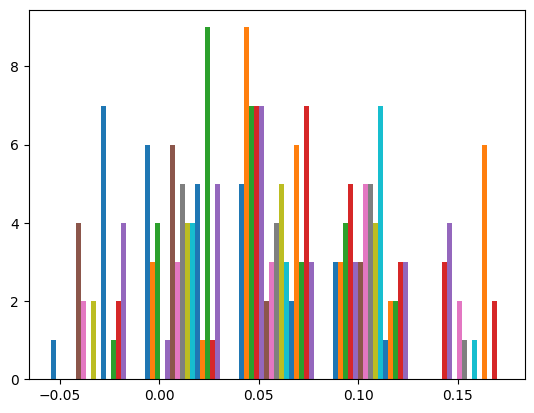

In [73]:
plt.hist(alpha_1,bins = int(5))
plt.show()

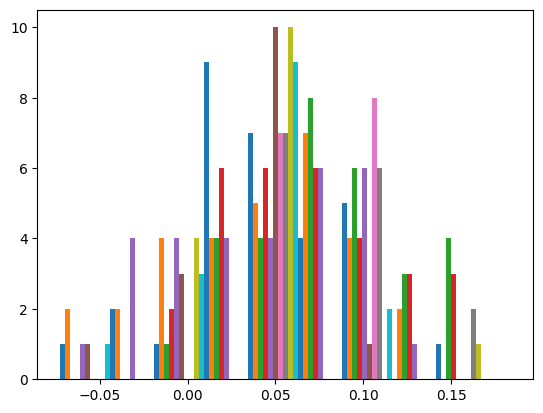

In [74]:
plt.hist(alpha_2,bins = int(5))
plt.show()

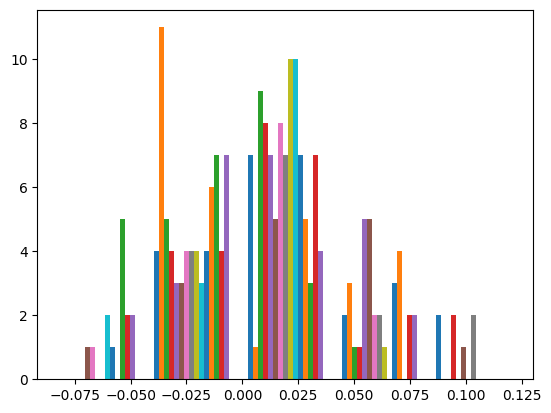

In [75]:
plt.hist(betta_1,bins = int(5))
plt.show()

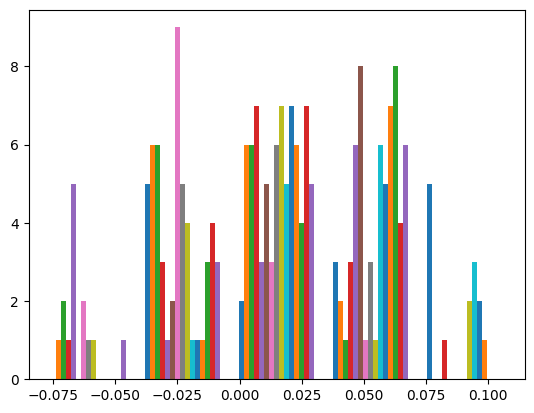

In [76]:
plt.hist(betta_2,bins = int(5))
plt.show()

# Stats

In [61]:
from hypyp import stats
import scipy

In [90]:
result_intra = []
for i in [0, 1]:
    alpha_intra, beta_intra = result_1[:, i:i+n_ch, i:i+n_ch]
    values_intra = alpha_intra
    values_intra -= np.diag(np.diag(values_intra))
    C_intra = (values_intra - np.mean(values_intra[:])) / np.std(values_intra[:]) 
result_intra.append(C_intra) 

In [108]:
alpha_1_mean = np.mean(psd1.psd, axis=1)
psd2_mean = np.mean(psd2.psd, axis=1)
X = np.array([psd1_mean, psd2_mean])
T_obs, p_values, H0 = mne.stats.permutation_t_test(X=X, n_permutations=5000,
                                                   tail=0, n_jobs=1)
T_obs, p_values, H0 = mne.stats.permutation_t_test(alpha, n_permutations=100,
                                                       tail=0, n_jobs=1)
H0

Permuting 99 times...


array([0.86508417, 0.89776977, 0.968682  , 1.02530244, 1.0850086 ,
       1.10252395, 1.15132209, 1.15274496, 1.15541004, 1.1567942 ,
       1.17399178, 1.19651056, 1.20081857, 1.21524202, 1.22331891,
       1.23345183, 1.24124914, 1.24784605, 1.25746223, 1.26132401,
       1.26280024, 1.28858299, 1.34392829, 1.38629881, 1.4063147 ,
       1.41359822, 1.4364872 , 1.448122  , 1.45060889, 1.45145038,
       1.45151598, 1.45282711, 1.46072295, 1.46374084, 1.50726602,
       1.52046314, 1.55369396, 1.57810045, 1.58597595, 1.62791802,
       1.63421414, 1.63593258, 1.70917521, 1.71743282, 1.78727496,
       1.80336057, 1.80373928, 1.80731435, 1.84206007, 1.85397655,
       1.85856342, 1.87031004, 1.88622178, 1.90162412, 1.91808387,
       1.9658418 , 1.97757637, 1.98997353, 2.00400882, 2.02689382,
       2.03948262, 2.08784797, 2.15691368, 2.17540691, 2.1769498 ,
       2.22813594, 2.25606217, 2.27171745, 2.30144204, 2.33739157,
       2.3412872 , 2.3444284 , 2.37870024, 2.44457431, 2.45722

In [548]:
psd1_mean = np.mean(psd1.psd, axis=1)
psd2_mean = np.mean(psd2.psd, axis=1)
X = np.array([psd1_mean, psd2_mean])
T_obs, p_values, H0 = mne.stats.permutation_t_test(X=X, n_permutations=5000,
                                                   tail=0, n_jobs=1)

Permuting 1 times (exact test)...


In [549]:
p_values

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5])

In [96]:
statsCondTuple = stats.statsCond(data=data_psd,
                                 epochs=preproc_S1,
                                 n_permutations=5000,
                                 alpha=0.05)

AssertionError: PSD does not have the appropriate shape!

In [551]:
statsCondTuple

statsCond(T_obs=array([1.49072572, 1.71558992, 1.31336272, 1.58841457, 1.81721892,
       4.18282361, 1.37976342, 1.21266367, 1.27729121, 1.20430675,
       1.22723061, 1.18338921, 1.29003983, 1.36422528, 1.43869799]), p_values=array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5]), H0=array([0.84503052, 4.18282361]), adj_p=(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False]), array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5])), T_obs_plot=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [552]:
con_matrixTuple = stats.con_matrix(preproc_S1, freqs_mean=psd1.freq_list)
ch_con_freq = con_matrixTuple.ch_con_freq

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 15


In [553]:
data_group = [np.array([psd1.psd, psd1.psd, psd1.psd]), np.array([psd2.psd, psd2.psd, psd2.psd])]

statscondCluster = stats.statscondCluster(data=data_group,
                                          freqs_mean=psd1.freq_list,
                                          ch_con_freq=scipy.sparse.bsr_matrix(ch_con_freq),
                                          tail=1,
                                          n_permutations=5000,
                                          alpha=0.05)

Using a threshold of 7.708647
stat_fun(H1): min=-13647213632183480.000000 max=inf
Running initial clustering …
Found 1 cluster


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\mne\stats\parametric.py:170: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

In [459]:
data = [np.array([values, values]), np.array([result_intra[0], result_intra[0]])]

statscondCluster = stats.statscondCluster(data=data,
                                          freqs_mean=np.arange(7.5, 11),
                                          ch_con_freq=None,
                                          tail=0,
                                          n_permutations=5000,
                                          alpha=0.05)

Using a threshold of 18.512821
stat_fun(H1): min=inf max=inf
Running initial clustering …
Found 1 cluster


C:\Users\NIKITA\PycharmProjects\pythonProject1\venv\lib\site-packages\hypyp\stats.py:337: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  F_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(data,


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

In [460]:
statscondCluster.cluster_p_values

array([0.3292])

In [425]:
from hypyp import viz

In [426]:
viz.plot_sensors_2d_intra(preproc_S1,preproc_S2)

In [427]:
statsCondTuple.H0

array([0.78358094, 8.34316858])

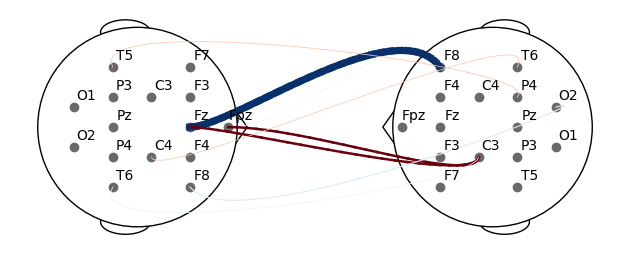

<Axes: >

In [435]:
viz.viz_2D_topomap_inter(epoch_1, epoch_2, C, threshold=2, steps=30, lab=True)

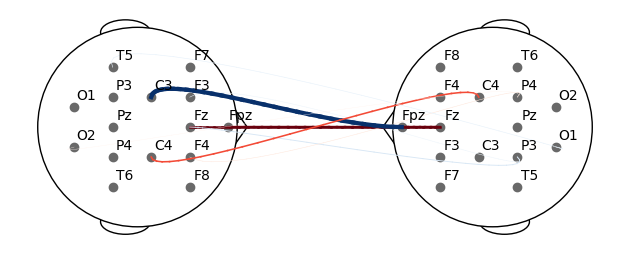

<Axes: >

In [430]:
from hypyp import viz
viz.viz_2D_topomap_inter(epoch_1, epoch_2, C_2, threshold=2, steps=30, lab=True)

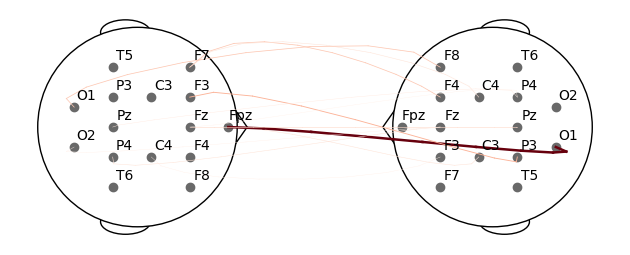

<Axes: >

In [431]:
# Inter-brain VAR-based connectivity (information flow from participant 1 to participant 2)
viz.viz_2D_topomap_inter(epoch_1, epoch_2, no_ICA_result_inter[0], threshold='auto', steps=10, lab=True)

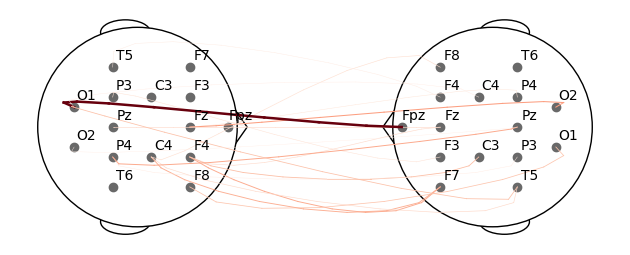

<Axes: >

In [432]:
#Inter-brain VAR-based connectivity (information flow from participant 2 to participant 1)
viz.viz_2D_topomap_inter(epoch_1, epoch_2, no_ICA_result_inter[1], threshold='auto', steps=10, lab=True)

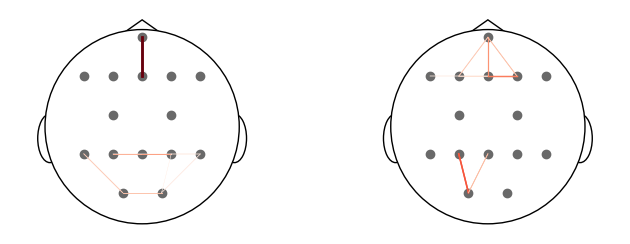

<Axes: >

In [433]:
viz.viz_2D_topomap_intra(epoch_1, epoch_2,
                         C1= result_intra[0],
                         C2= result_intra[1],
                         threshold='auto',
                         steps=2,
                         lab=False)

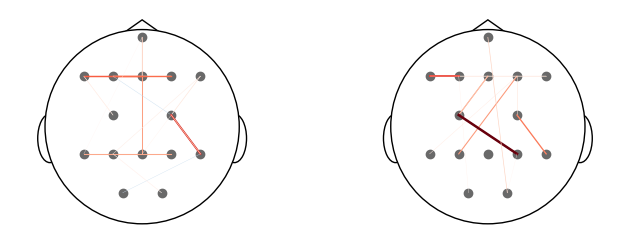

<Axes: >

In [434]:
viz.viz_2D_topomap_intra(epoch_1, epoch_2,
                         C1= no_ICA_result_intra[0],
                         C2= no_ICA_result_intra[1],
                         threshold='auto',
                         steps=2,
                         lab=False)